# Random Forests
In this activity, we will briefly compare Random Forests and Decision Trees. Decision Trees are highly influenced by variance: small changes in the data can result in a completely different tree. Random Forests, on the other hand, address this issue by averaging multiple Decision Trees, which reduces overfitting and variance.

## Random Forest algorithm
+ Use *k* bootstrap replicates to train *k* different decision trees (DTs);
+ At each node, pick a subset of features at random;
+ Aggregate the predictions of each tree to make classification decision.

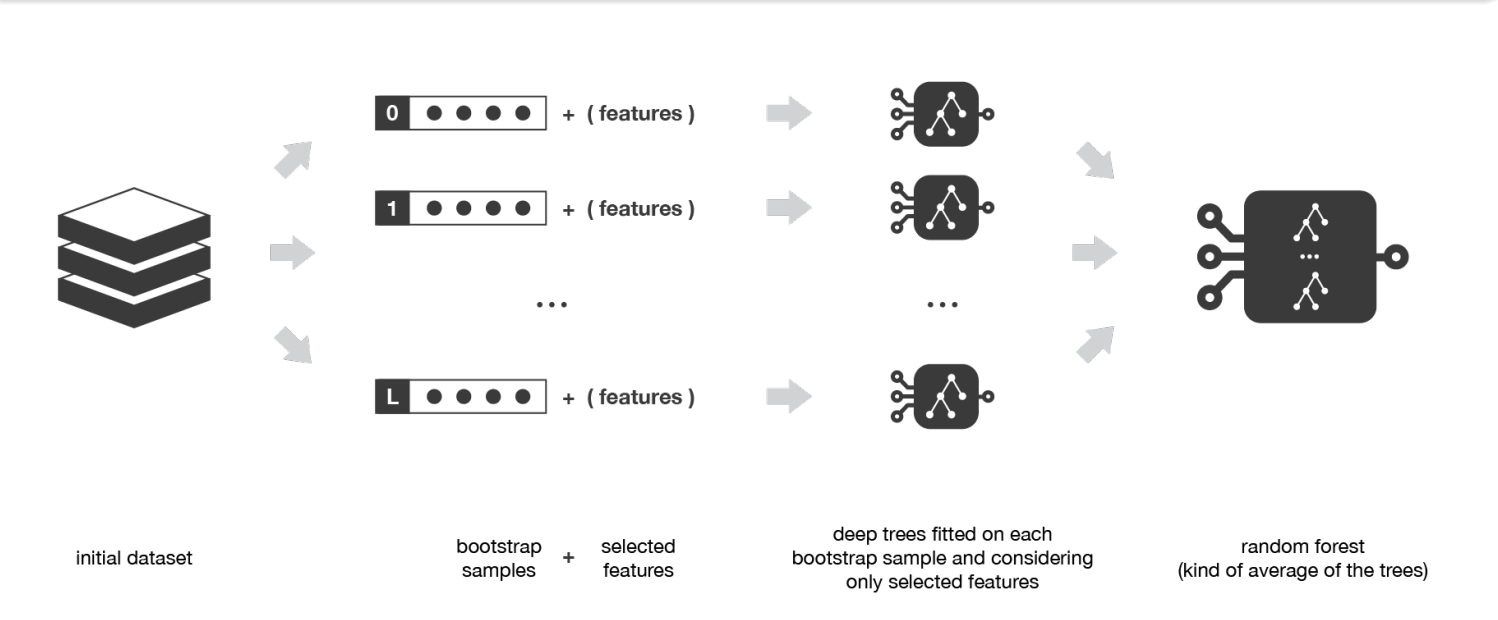

## Dataset: `make_moons`
Let's analyze the `make_moons` dataset. This dataset contains two classes, and the user can set the total number of samples. Each instance is described by two features, and the user can set a noise parameter to simulate a real dataset.

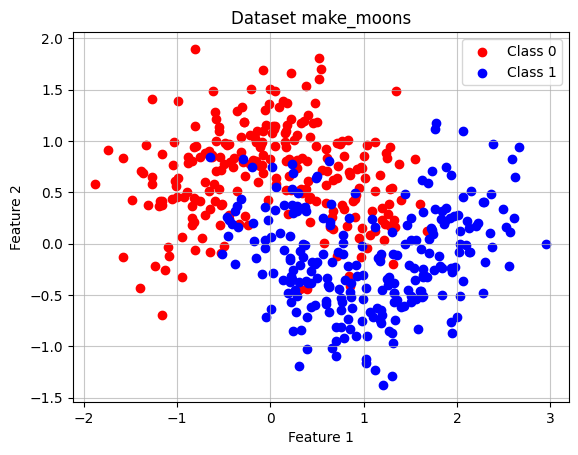

In [ ]:
from sklearn.datasets import make_moons
import matplotlib.pyplot as plt
# Dataset creation
X, y = make_moons(n_samples=500, noise=0.35, random_state=42)

# Plot
plt.scatter(X[y == 0, 0], X[y == 0, 1], color='red', label='Class 0')
plt.scatter(X[y == 1, 0], X[y == 1, 1], color='blue', label='Class 1')
plt.title("Dataset make_moons")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.legend()
plt.grid(alpha=0.7)
plt.show()


 ## DTs: train and optimal parameters
 We start training and optimizing a Decision Tree to find the best hyperparameters, using `GridSearchCV`, like `max_depth`, `min_samples_split` and `min_samples_leaf`.




In [ ]:
import numpy as np
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

In [ ]:
# Splitting data for training and testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Search of optimal parameters
param_grid = {
    'max_depth': [2, 4, 6, 8, 10, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4, 8]
}
grid_search = GridSearchCV(
    estimator=DecisionTreeClassifier(random_state=42),
    param_grid=param_grid,
    cv=5,
    scoring='accuracy'
)

grid_search.fit(X_train, y_train)

# Print best parameters
best_params = grid_search.best_params_
print("Best parameters:")
print(best_params)

# Accuracy on optimized DT
best_tree = grid_search.best_estimator_
y_pred = best_tree.predict(X_test)
accuracy_optimized = accuracy_score(y_test, y_pred)
print(f"\nAccuracy of the optimized DT: {accuracy_optimized:.2f}")


Best parameters:
{'max_depth': 6, 'min_samples_leaf': 8, 'min_samples_split': 2}

Accuracy of the optimized DT: 0.81


We obtain a Decision Tree with 0.81 accuracy on the test data. Now, let's see how a Random Forest performs in this particular case. We will test different forest sizes.


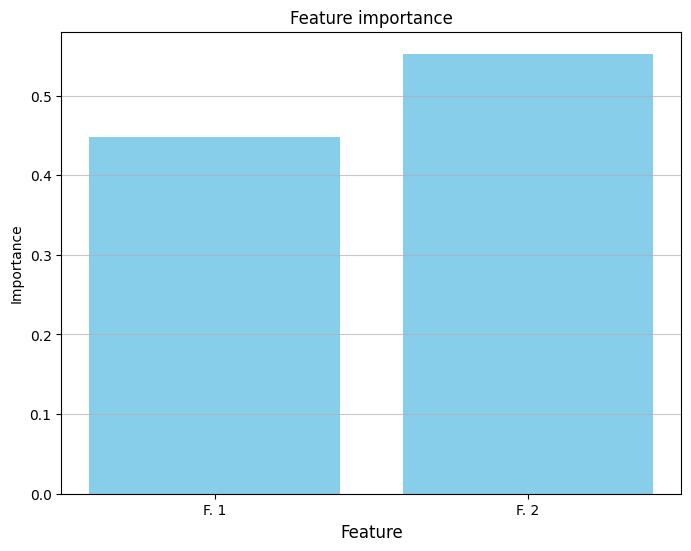

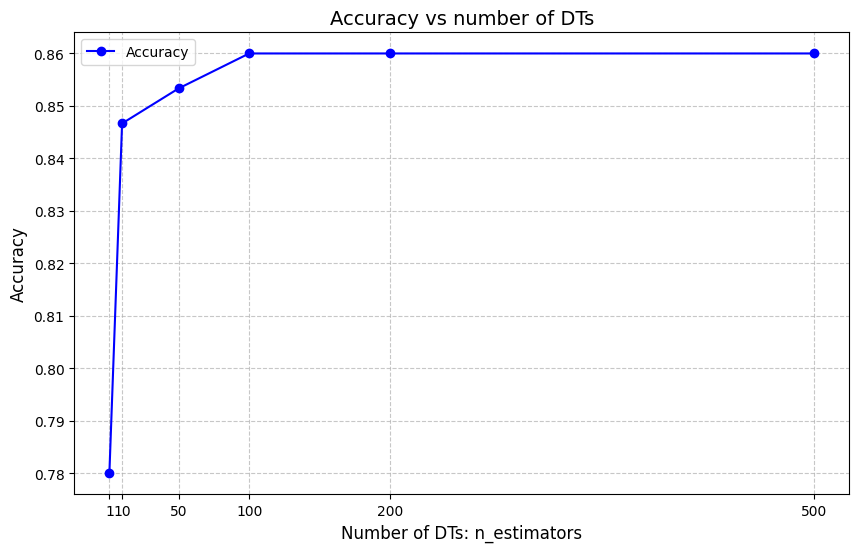

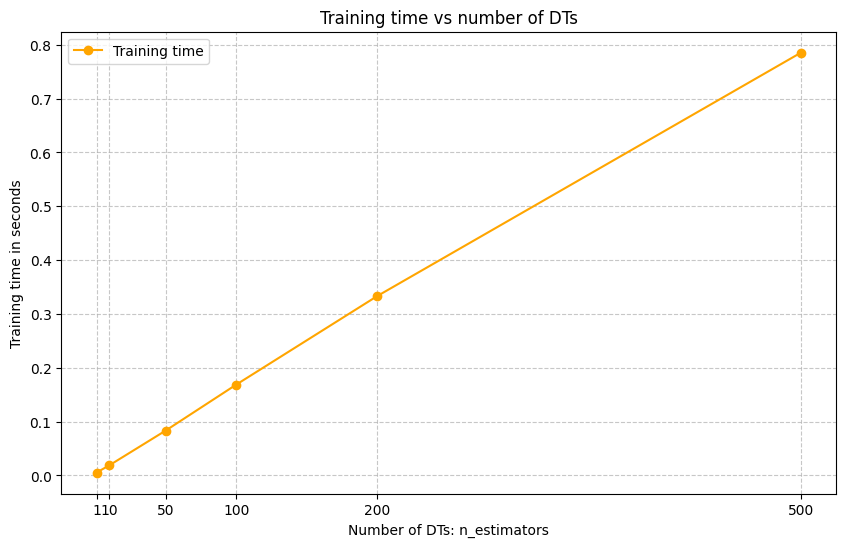

In [ ]:
import time
from sklearn.ensemble import RandomForestClassifier

# Feature importance
random_forest = RandomForestClassifier(n_estimators=100, random_state=42)
random_forest.fit(X_train, y_train)
y_pred_forest = random_forest.predict(X_test)
accuracy_forest = accuracy_score(y_test, y_pred_forest)

features = ["F. 1", "F. 2"]
feature_importances = random_forest.feature_importances_

# Plot: feature importance
plt.figure(figsize=(8, 6))
plt.bar(features, feature_importances, color="skyblue")
plt.title("Feature importance")
plt.ylabel("Importance")
plt.xlabel("Feature", fontsize=12)
plt.grid(axis="y", alpha=0.7)
plt.show()


# Random Forest of [1, 10, 50, 100, 200, 500] DTs (n_estimators)
n_estimators_range = [1, 10, 50, 100, 200, 500]
accuracies = []
training_times = []

for n in n_estimators_range:
    start_time = time.time()
    rf = RandomForestClassifier(n_estimators=n, random_state=42)
    rf.fit(X_train, y_train)
    training_times.append(time.time() - start_time)
    accuracies.append(accuracy_score(y_test, rf.predict(X_test)))

# Plot: accuracy vs number of DTs
plt.figure(figsize=(10, 6))
plt.plot(n_estimators_range, accuracies, marker='o', label="Accuracy", color="blue")
plt.title("Accuracy vs number of DTs", fontsize=14)
plt.xlabel("Number of DTs: n_estimators", fontsize=12)
plt.ylabel("Accuracy", fontsize=12)
plt.grid(linestyle='--', alpha=0.7)
plt.xticks(n_estimators_range)
plt.legend()
plt.show()

# Plot: training time vs number of DTs
plt.figure(figsize=(10, 6))
plt.plot(n_estimators_range, training_times, marker='o', label="Training time", color="orange")
plt.title("Training time vs number of DTs")
plt.xlabel("Number of DTs: n_estimators")
plt.ylabel("Training time in seconds")
plt.grid(linestyle='--', alpha=0.7)
plt.xticks(n_estimators_range)
plt.legend()
plt.show()

# Conclusion
The results demonstrated that Random Forests consistently outperform a single Decision Tree in terms of accuracy. This makes Random Forests a better choice than DTs for tasks requiring reliable predictions on noisy data.